# **BOJOS PER LA SUPERCOMPUTACIÓ - 2023**


## **Estudio de mutaciones de P53**
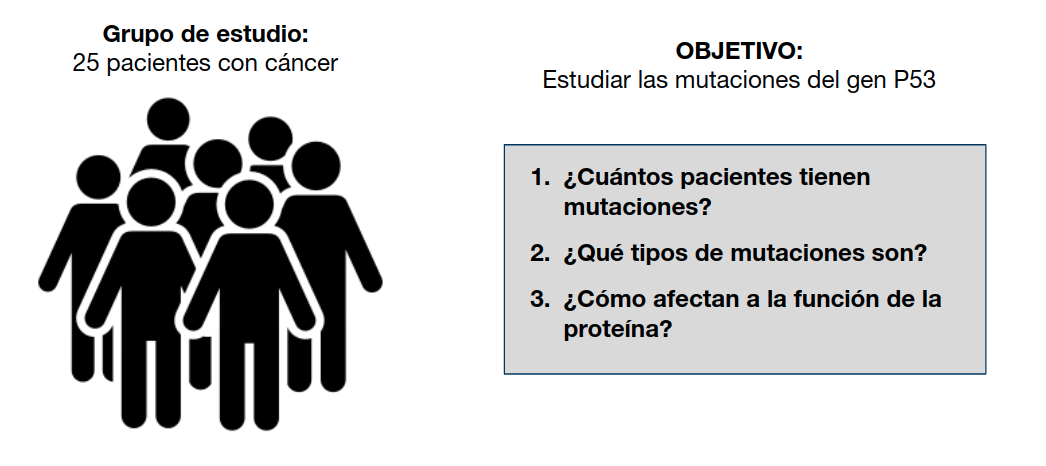

# 0. Preparación

## 0.1 Cargar paquetes

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
from google.colab import files

## 0.2 Cargar archivos

Corremos el código. Clicamos la opción *Choose files*. Debemos cargar dos archivos:
1. info_pacientes.tsv
2. seq_pacientes.tsv

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving info_pacientes.csv to info_pacientes.csv
Saving seq_pacientes.fasta to seq_pacientes.fasta
User uploaded file "info_pacientes.csv" with length 1577 bytes
User uploaded file "seq_pacientes.fasta" with length 28074 bytes


# 1. Importar información de los pacientes

Para empezar, creamos una tabla (llamada *info_pacientes*) a partir de la información de los pacientes del archivo 'info_pacientes.csv'. Para ello usamos el paquete "pandas" (un paquete creado para manejar tablas con Python). 

In [ ]:
info_pacientes = pd.read_csv("info_pacientes.csv", sep='\t')

Primero, debemos visualizar la tabla para comprovar que la hemos cargado correctamente y para entender qué datos tenemos.

In [ ]:
# Visualizar la tabla
# El comando 'head()' nos permite visualizar las primeras filas de la tabla
info_pacientes.head(n=10)

,paciente,sexo,edad,tratamiento
0,Paciente1,mujer,80,no_responde
1,Paciente2,hombre,49,responde
2,Paciente3,mujer,62,no_responde
3,Paciente4,hombre,83,no_responde
4,Paciente5,mujer,54,responde
5,Paciente6,hombre,85,no_responde
6,Paciente7,hombre,28,responde
7,Paciente8,hombre,67,no_responde
8,Paciente9,mujer,55,no_responde
9,Paciente10,hombre,4,no_responde


### **PREGUNTA 1**
Es importante comprobar que hemos importado bien todos los datos. ¿Sabrías decir cuántos pacientes hay en la tabla?


In [ ]:
# Escribe aquí tu código


*PISTA: Recordad que para saber la longitud de la tabla podemos usar el comando len()*

# 2. Importar las secuencias de los pacientes
Ahora que tenemos la información de los pacientes, vamos a importar las secuencias de los genes a partir del archivo FASTA. Leemos el archivo y guardamos en un diccionario (llamado *seq_dict_nt*) la secuencia de cada paciente.



In [ ]:
# Abrimos archivo FASTA
filename = 'seq_pacientes.fasta'
fd = open(filename,'r')

# Creamos el diccionario vacío
seq_dict_nt = {}

# Leemos el archivo línea por línea y guardamos las secuencias en el diccionario
for line in fd:
    if line.startswith('>'):
        id_seq = line.rstrip().replace('>','').replace('- P53','').replace(' ','')
        seq_dict_nt[id_seq] = ""
    else:
        seq_dict_nt[id_seq] += line.rstrip()

Vamos a echar un vistazo a las secuencias que hemos importado.

Comprobamos que tenemos todos los pacientes usando el comando *len()*. Deberíamos tener 25 pacientes + 1 secuencia de referencia = 26.

In [ ]:
len(seq_dict_nt)

26

In [ ]:
# Visualizar el diccionario
for nombre_paciente,secuencia in seq_dict_nt.items():
  print(nombre_paciente,':',secuencia)

Reference : ATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTCCAGTGGTAATCTACTGGGACGGAACAGCTTTGAGGTGCGTGTTTGTGCCTGTCCTGGGAGAGACCGGCGCACAGAGGAAGAGAATCTCCGCAAGAAAGGGGAGCCTCACCACGAGCTGCCCCCAGGGAGCACTAAGCGAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAATATTTCACCC

Vemos que hay algunos pacientes sin secuencia! Esto significa que estos pacientes no tienen el gen P53 en su genoma, es decir, tienen una **deleción**.

### **PREGUNTA 2**
¿Sabrías acceder a la secuencia de referencia?


In [ ]:
# escribe aquí tu código


*TIP: recuerda que para acceder al valor de un diccionario a partir de su clave, usamos la estructura: mi_diccionario['clave']*

¿Qué longitud tiene la secuencia de referencia? Guarda el resultado en una variable llamada *longitud_referencia_nt*

In [ ]:
# escribe aquí tu código


In [ ]:
# SOLUCIÓN !
longitud_referencia_nt = len(seq_dict_nt['Reference'])
longitud_referencia_nt

1182

¿Qué longitud tiene la secuencia del Paciente20?

In [ ]:
# escribe aquí tu código


Vamos a investigar si esto pasa con más pacientes!



In [ ]:
# Creamos un diccionario para guardar la longitud de la secuencia de nucleótidos de cada paciente
dict_len_nt = {}

for nombre_paciente,secuencia in seq_dict_nt.items():
  dict_len_nt[nombre_paciente] = len(secuencia) #usando el comando 'len()'

In [ ]:
# Añadimos esta información a la tabla en una nueva columna 'len_nt'
info_pacientes['len_nt'] = info_pacientes['paciente'].map(dict_len_nt)
info_pacientes['len_nt'] = info_pacientes['len_nt'].astype('Int64')

# Visualizamos de nuevo la tabla
info_pacientes.head()

,paciente,sexo,edad,tratamiento,len_nt
0,Paciente1,mujer,80,no_responde,1182
1,Paciente2,hombre,49,responde,1182
2,Paciente3,mujer,62,no_responde,1182
3,Paciente4,hombre,83,no_responde,0
4,Paciente5,mujer,54,responde,1182


### **PREGUNTA 3**

Mirando la tabla anterior, ¿sabrías decir cuántos pacientes tienen una deleción del gen P53, es decir, la longitud del gen es 0?

*PISTA: Una manera más rápida de mirarlo sería filtrar la tabla por los pacientes que tengan la columna len_nt == 0, con el siguiente comando:*

In [ ]:
pacientes_delecion = info_pacientes[info_pacientes.len_nt == 0]
pacientes_delecion

,paciente,sexo,edad,tratamiento,len_nt
3,Paciente4,hombre,83,no_responde,0
17,Paciente18,mujer,66,no_responde,0
19,Paciente20,hombre,49,no_responde,0


*Luego podríamos calcular la longitud de esta nueva tabla*

In [ ]:
len(pacientes_delecion)

3

# 3. Estudio de mutaciones a nivel de nucleótidos (gen)

Vamos a estudiar qué mutaciones encontramos en nuestros pacientes. Para ello, debemos comparar las secuencias de los pacientes con la secuencia de referencia. Hemos preparado un pequeño código para ello:

In [ ]:
# Guardamos en una variable nuestra secuencia de referencia
seq_referencia = seq_dict_nt['Reference']

# Creamos una lista de pacientes
pacientes_lista = [x for x in seq_dict_nt.keys() if x != 'Reference']

# Creamos distintos diccionarios para guardar la información de las mutaciones que encontremos
dict_mutaciones_pos = {}
dict_mutaciones_ref = {}
dict_mutaciones_mut = {}

# Buscamos las mutaciones
for paciente in pacientes_lista:
  count = 1
  seq_paciente = seq_dict_nt[paciente]
  dict_mutaciones_pos[paciente] = None
  dict_mutaciones_ref[paciente] = None
  dict_mutaciones_mut[paciente] = None
  for i in range(0,len(seq_paciente)):
    if seq_referencia[i] != seq_paciente[i]:
      print("{}: ¡Mutación! En la posición {} (ref {} > mut {})".format(paciente,count, seq_referencia[i], seq_paciente[i]))
      dict_mutaciones_pos[paciente] = int(count)
      dict_mutaciones_ref[paciente] = seq_referencia[i]
      dict_mutaciones_mut[paciente] = seq_paciente[i]
    count = count + 1

Paciente1: ¡Mutación! En la posición 614 (ref A > mut C)
Paciente3: ¡Mutación! En la posición 784 (ref G > mut C)
Paciente5: ¡Mutación! En la posición 156 (ref A > mut G)
Paciente6: ¡Mutación! En la posición 641 (ref A > mut G)
Paciente8: ¡Mutación! En la posición 69 (ref G > mut A)
Paciente9: ¡Mutación! En la posición 592 (ref G > mut A)
Paciente10: ¡Mutación! En la posición 451 (ref C > mut T)
Paciente11: ¡Mutación! En la posición 711 (ref G > mut A)
Paciente12: ¡Mutación! En la posición 592 (ref G > mut A)
Paciente14: ¡Mutación! En la posición 118 (ref A > mut C)
Paciente16: ¡Mutación! En la posición 1017 (ref G > mut A)
Paciente19: ¡Mutación! En la posición 586 (ref C > mut T)
Paciente22: ¡Mutación! En la posición 836 (ref G > mut C)
Paciente23: ¡Mutación! En la posición 742 (ref C > mut T)
Paciente24: ¡Mutación! En la posición 817 (ref C > mut A)
Paciente25: ¡Mutación! En la posición 818 (ref G > mut C)


Vemos que varios pacientes presentan alguna mutación. Vamos a guardar esta información en nuestra tabla de pacientes para verla mejor. Para ello, vamos a crear 3 nuevas columnas:
- mutation_nt: contiene la posición del nucleótido mutado
- nucleotido_ref: contiene el nucleótido de referencia
- nucleotido_mut: contiene el nucleótido mutado

In [ ]:
# Añadir información a la tabla
info_pacientes['mutation_nt'] = info_pacientes['paciente'].map(dict_mutaciones_pos)
info_pacientes['mutation_nt'] = info_pacientes['mutation_nt'].astype('Int64')

info_pacientes['nucleotido_ref'] = info_pacientes['paciente'].map(dict_mutaciones_ref)
info_pacientes['nucleotido_mut'] = info_pacientes['paciente'].map(dict_mutaciones_mut)

# Visualizamos de nuevo la tabla
info_pacientes.head(n=10)

,paciente,sexo,edad,tratamiento,len_nt,mutation_nt,nucleotido_ref,nucleotido_mut
0,Paciente1,mujer,80,no_responde,1182,614,A,C
1,Paciente2,hombre,49,responde,1182,<NA>,None,None
2,Paciente3,mujer,62,no_responde,1182,784,G,C
3,Paciente4,hombre,83,no_responde,0,<NA>,None,None
4,Paciente5,mujer,54,responde,1182,156,A,G
5,Paciente6,hombre,85,no_responde,1182,641,A,G
6,Paciente7,hombre,28,responde,1182,<NA>,None,None
7,Paciente8,hombre,67,no_responde,1182,69,G,A
8,Paciente9,mujer,55,no_responde,1182,592,G,A
9,Paciente10,hombre,4,no_responde,1182,451,C,T


Si nos fijamos en las nuevas columnas (mutation_nt, nucleotido_re, nucleotido_mut) vemos que aparecen unos valores: < NA >, None. Son los valores nulos (missing values) que se asignan automáticamente al no encontrarse ninguna información para rellenar es casilla. Es decir, significa que esos pacientes no tienen ninguna mutación.

### **PREGUNTA 4**

¿Cuántos pacientes tienen alguna mutación? ¿Cuál es el porcentaje respecto el total de pacientes?

*CONSEJO: Para saberlo, podemos contar manualmente visualizando nuestra tabla, o bien podemos usar la función 'notnull()', que cuenta el número de filas que no son missing values*

In [ ]:
pacientes_mutados = info_pacientes[info_pacientes.mutation_nt.notnull()]
pacientes_mutados

,paciente,sexo,edad,tratamiento,len_nt,mutation_nt,nucleotido_ref,nucleotido_mut
0,Paciente1,mujer,80,no_responde,1182,614,A,C
2,Paciente3,mujer,62,no_responde,1182,784,G,C
4,Paciente5,mujer,54,responde,1182,156,A,G
5,Paciente6,hombre,85,no_responde,1182,641,A,G
7,Paciente8,hombre,67,no_responde,1182,69,G,A
8,Paciente9,mujer,55,no_responde,1182,592,G,A
9,Paciente10,hombre,4,no_responde,1182,451,C,T
10,Paciente11,hombre,59,responde,1182,711,G,A
11,Paciente12,mujer,60,no_responde,1182,592,G,A
13,Paciente14,hombre,53,no_responde,1182,118,A,C


In [ ]:
len(pacientes_mutados)

16

*Y finalmente calculamos el porcentaje:*

In [ ]:
(len(pacientes_mutados) / 25) * 100

32.0

### **PREGUNTA 5**

Mirando la tabla, ¿sabrías decir si estas mutaciones se distribuyen de manera aleatoria a lo largo del gen, o bien se concentran en una sola región? 

Mirar la tabla puede ser bastante tedioso, y aún más si en lugar de 50 pacientes tuvieramos miles! Por eso, vamos a visualizarlo con un gráfico.

In [ ]:
# Preparar los datos para hacer el plot
recuento_mutaciones = dict(info_pacientes['mutation_nt'].value_counts())

counts_table = pd.DataFrame(columns=['position','count'])
counts_table['position'] = [x for x in range(1,longitud_referencia_nt)]
counts_table['count'] = 0
counts_table['count'] = counts_table['position'].map(recuento_mutaciones)
counts_table = counts_table.fillna(0)
counts_table['count'] = counts_table['count'].astype('Int64')

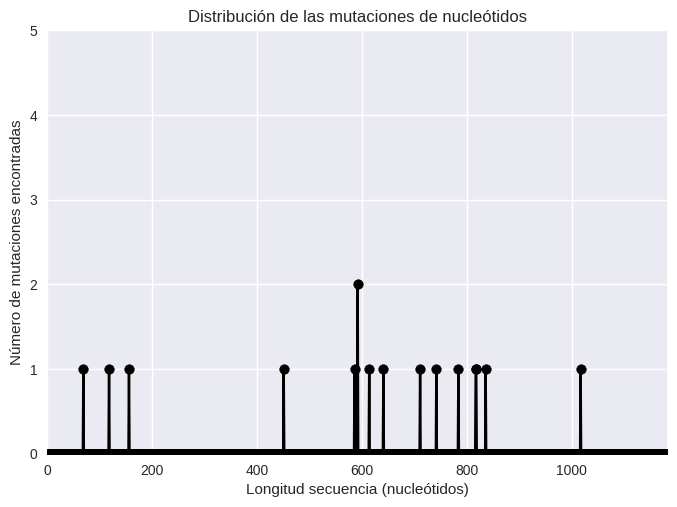

In [ ]:
## Plot
plt.style.use('seaborn-v0_8')
plt.scatter(counts_table['position'],counts_table['count'],color='black')
plt.plot(counts_table['position'],counts_table['count'],color='black')
# Límites ejes
plt.xlim(0,longitud_referencia_nt)
plt.ylim(0,5)
# Añadir título y leyenda de los ejes
plt.title("Distribución de las mutaciones de nucleótidos")
plt.xlabel("Longitud secuencia (nucleótidos)")
plt.ylabel("Número de mutaciones encontradas")

plt.show()

¿Qué vemos en este gráfico? En el eje de las X, tenemos la longitud de la secuencia del gen. El eje de las Y representa el número de mutaciones que hemos encontrado en esa posición.

Teniendo en cuenta este gráfico, ¿podrías responder ahora a la pregunta?

# 4. Estudio de mutaciones a nivel de aminoácidos (proteína)

¿Cómo afectan estas mutaciones del gen a la proteína?

Para estudiar esto, primero debemos traducir nuestros genes a proteínas. Es decir, pasaremos de tener una secuencia de nucleótidos a una secuencia de aminoácidos, tal como habéis hecho al inicio de la clase. 

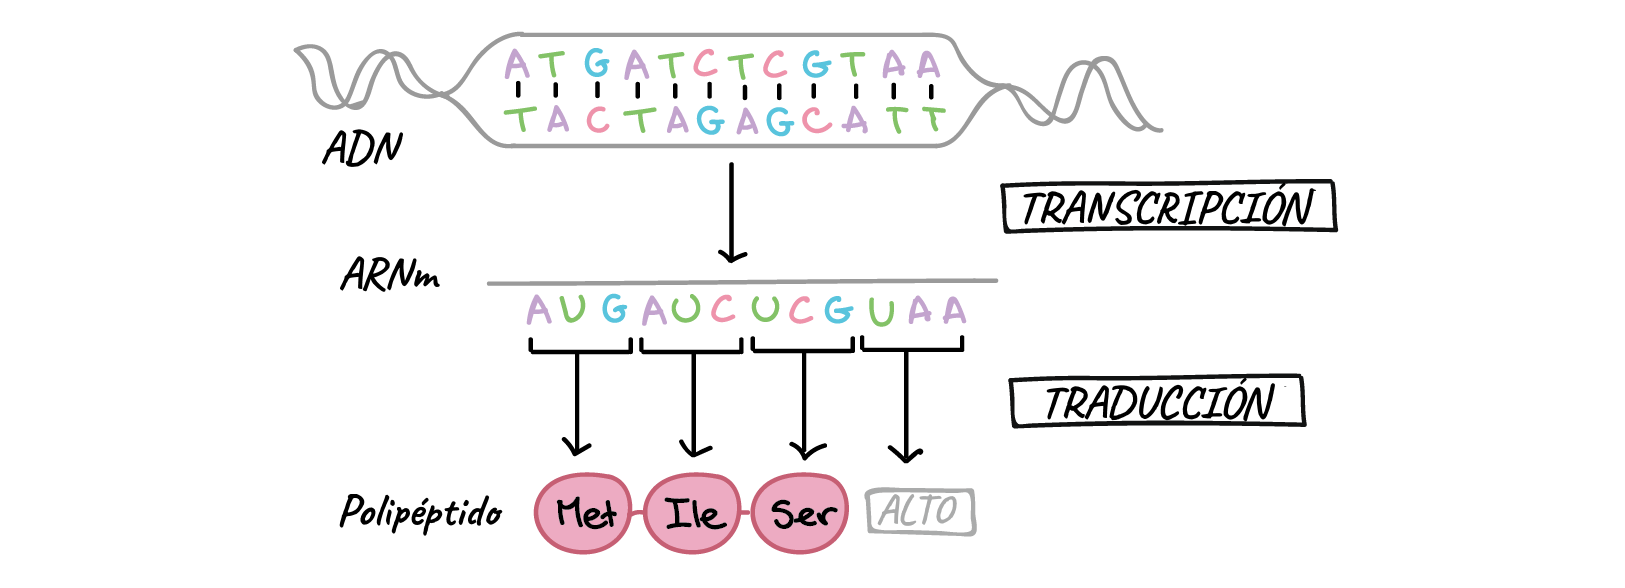

En lugar de hacerlo manualmente, hemos creado una función (llamada *translate*) que coge como input una secuencia de **nucleótidos** y devuelve una secuencia de **aminoácidos**.

In [ ]:
# Creamos la función 
def translate(seq):
      
    table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
    protein =""
    if len(seq)%3 == 0:
        for i in range(0, len(seq), 3):
            codon = seq[i:i + 3]
            protein+= table[codon]
            if table[codon] == '_':
              break
    return protein

Para usar una función en python, llamamos esa función por su nombre y entre paréntesis ponemos nuestro input. En este caso, el input es el nombre de la secuencia que queremos traducir.

Por ejemplo, para traducir la secuencia de referencia, usaríamos el siguiente comando:

In [ ]:
# Guardamos en una variable nuestra secuencia de referencia a partir del diccionario seq_dict_nt
seq_referencia = seq_dict_nt['Reference']

# Llamamos la función translate
translate(seq_referencia)

'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD_'

### **PREGUNTA 6**

Muestra la secuencia proteica del paciente 8

In [ ]:
# escribe aquí tu código


¿Qué tiene de extraño esta secuencia? Vamos a ver si hay más secuencias a las que les pase lo mismo.

Para traducir las secuencias de todos los pacientes, vamos a usar un bucle con el comando *for* que itere por todos los pacientes y guarde la secuencia traducida en un nuevo diccionario (llamado *seq_dict_aa*).

In [ ]:
# Creamos el diccionario vacío
seq_dict_aa = {}

# Bucle para iterar por todos los pacientes
for a,b in seq_dict_nt.items():
  seq_dict_aa[a] = translate(b) # Guardamos la traducción usando la función translate()

### **PREGUNTA 7**

¿Qué longitud tiene la secuencia proteica de referencia?

In [ ]:
longitud_referencia_aa = len(seq_dict_aa['Reference'])
longitud_referencia_aa

394

¿Todas las proteínas de los pacientes tienen la misma longitud?

In [ ]:
# Creamos un diccionario para guardar la longitud de la proteína de cada paciente
dict_len_aa = {}

for a,b in seq_dict_aa.items():
  dict_len_aa[a] = len(b)

In [ ]:
# Añadir esta información a la tabla en una nueva columna 'len_nt'
info_pacientes['len_aa'] = info_pacientes['paciente'].map(dict_len_aa)
info_pacientes['len_aa'] = info_pacientes['len_aa'].astype('Int64')

# Visualizamos de nuevo la tabla
info_pacientes.head(n=10)

,paciente,sexo,edad,tratamiento,len_nt,mutation_nt,nucleotido_ref,nucleotido_mut,len_aa
0,Paciente1,mujer,80,no_responde,1182,614,A,C,394
1,Paciente2,hombre,49,responde,1182,<NA>,None,None,394
2,Paciente3,mujer,62,no_responde,1182,784,G,C,394
3,Paciente4,hombre,83,no_responde,0,<NA>,None,None,0
4,Paciente5,mujer,54,responde,1182,156,A,G,394
5,Paciente6,hombre,85,no_responde,1182,641,A,G,394
6,Paciente7,hombre,28,responde,1182,<NA>,None,None,394
7,Paciente8,hombre,67,no_responde,1182,69,G,A,23
8,Paciente9,mujer,55,no_responde,1182,592,G,A,394
9,Paciente10,hombre,4,no_responde,1182,451,C,T,394


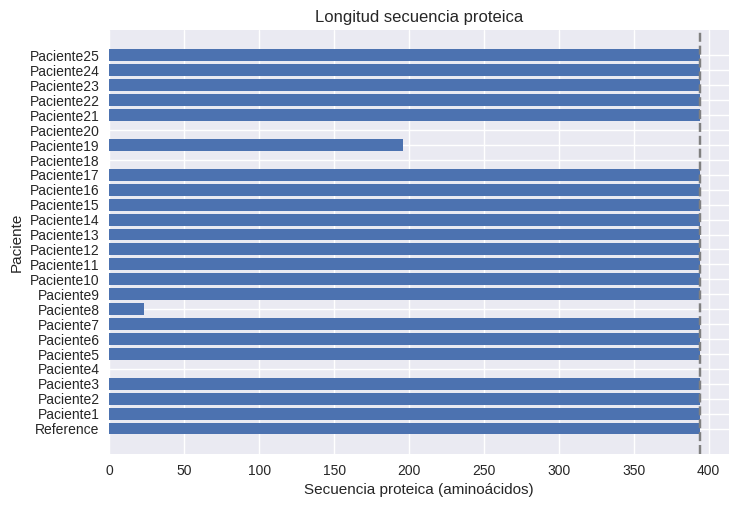

In [39]:
plt.barh([x for x in dict_len_aa.keys()],  [x for x in dict_len_aa.values()])
plt.axvline(x = longitud_referencia_aa, color='grey',linestyle = '--')
plt.title("Longitud secuencia proteica")
plt.ylabel("Paciente")
plt.xlabel("Secuencia proteica (aminoácidos)")
plt.show()

### **PREGUNTA 8**
¿Cuántos pacientes tienen una proteína más corta que lo normal (sin incluir las deleciones)? ¿Cómo se llama este tipo de mutaciones?

Al igual que hemos hecho al estudiar las mutaciones de nucleótidos, vamos a comparar las secuencias de aminoácidos de los pacientes contra la secuencia de aminoácidos de referencia de P53.

In [ ]:
# Guardamos en una variable nuestra secuencia de referencia
seq_referencia_aa = seq_dict_aa['Reference']

# Creamos distintos diccionarios para guardar la información de las mutaciones que encontremos
dict_mutaciones_pos_aa = {}
dict_mutaciones_ref_aa = {}
dict_mutaciones_mut_aa = {}

# Buscamos las mutaciones
for paciente in pacientes_lista:
  count = 1
  seq_paciente = seq_dict_aa[paciente]
  dict_mutaciones_pos_aa[paciente] = None
  dict_mutaciones_ref_aa[paciente] = None
  dict_mutaciones_mut_aa[paciente] = None
  for i in range(0,len(seq_paciente)):
    if seq_referencia_aa[i] != seq_paciente[i]:
      print("{}: ¡Mutación! En la posición {} (ref {} > mut {})".format(paciente,count, seq_referencia[i], seq_paciente[i]))
      dict_mutaciones_pos_aa[paciente] = int(count)
      dict_mutaciones_ref_aa[paciente] = seq_referencia[i]
      dict_mutaciones_mut_aa[paciente] = seq_paciente[i]
    count = count + 1

Paciente1: ¡Mutación! En la posición 205 (ref G > mut S)
Paciente3: ¡Mutación! En la posición 262 (ref G > mut R)
Paciente6: ¡Mutación! En la posición 214 (ref C > mut R)
Paciente8: ¡Mutación! En la posición 23 (ref C > mut _)
Paciente9: ¡Mutación! En la posición 198 (ref G > mut K)
Paciente10: ¡Mutación! En la posición 151 (ref G > mut S)
Paciente11: ¡Mutación! En la posición 237 (ref T > mut I)
Paciente12: ¡Mutación! En la posición 198 (ref G > mut K)
Paciente14: ¡Mutación! En la posición 40 (ref C > mut L)
Paciente19: ¡Mutación! En la posición 196 (ref A > mut _)
Paciente22: ¡Mutación! En la posición 279 (ref G > mut A)
Paciente23: ¡Mutación! En la posición 248 (ref C > mut W)
Paciente24: ¡Mutación! En la posición 273 (ref G > mut S)
Paciente25: ¡Mutación! En la posición 273 (ref G > mut P)


In [ ]:
# Añadir información a la tabla
info_pacientes['mutation_aa'] = info_pacientes['paciente'].map(dict_mutaciones_pos_aa)
info_pacientes['mutation_aa'] = info_pacientes['mutation_aa'].astype('Int64')

info_pacientes['aminoacido_ref'] = info_pacientes['paciente'].map(dict_mutaciones_ref_aa)
info_pacientes['aminoacido_mut'] = info_pacientes['paciente'].map(dict_mutaciones_mut_aa)

# Visualizamos de nuevo la tabla
info_pacientes.head(n=10)

,paciente,sexo,edad,tratamiento,len_nt,mutation_nt,nucleotido_ref,nucleotido_mut,len_aa,mutation_aa,aminoacido_ref,aminoacido_mut
0,Paciente1,mujer,80,no_responde,1182,614,A,C,394,205,G,S
1,Paciente2,hombre,49,responde,1182,<NA>,None,None,394,<NA>,None,None
2,Paciente3,mujer,62,no_responde,1182,784,G,C,394,262,G,R
3,Paciente4,hombre,83,no_responde,0,<NA>,None,None,0,<NA>,None,None
4,Paciente5,mujer,54,responde,1182,156,A,G,394,<NA>,None,None
5,Paciente6,hombre,85,no_responde,1182,641,A,G,394,214,C,R
6,Paciente7,hombre,28,responde,1182,<NA>,None,None,394,<NA>,None,None
7,Paciente8,hombre,67,no_responde,1182,69,G,A,23,23,C,_
8,Paciente9,mujer,55,no_responde,1182,592,G,A,394,198,G,K
9,Paciente10,hombre,4,no_responde,1182,451,C,T,394,151,G,S


### **PREGUNTA 9**
¿Cuántos pacientes tienen una mutación en la proteína?

In [ ]:
# escribe aquí tu código


### **PREGUNTA 10**
¿Hay pacientes con mutaciones a nivel de nucleótidos pero no a nivel de aminoácidos? ¿Cuántos? ¿Sabrías decir qué tipo de mutación tienen?

In [ ]:
# escribe aquí tu código


*SOLUCIÓN: Filtramos la tabla para aquellos pacientes que tengan una mutación a nivel de nucleótido (mutation_nt) pero no a nivel de aminoácidos (mutation_aa).*

In [ ]:
pacientes_mut_sil = info_pacientes[info_pacientes.mutation_nt.notnull()] #pacientes con mutación en el gen
pacientes_mut_sil = pacientes_mut_sil[pacientes_mut_sil.mutation_aa.isnull()] #pacientes sin mutación en la proteína
pacientes_mut_sil

,paciente,sexo,edad,tratamiento,len_nt,mutation_nt,nucleotido_ref,nucleotido_mut,len_aa,mutation_aa,aminoacido_ref,aminoacido_mut
4,Paciente5,mujer,54,responde,1182,156,A,G,394,<NA>,None,None
15,Paciente16,mujer,35,responde,1182,1017,G,A,394,<NA>,None,None


### **PREGUNTA 11**
¿Cuántos pacientes tienen una mutación con cambio de aminoácido?

In [38]:
pacientes_mut_missense = info_pacientes[info_pacientes.len_aa == 394]
pacientes_mut_missense = pacientes_mut_missense[pacientes_mut_missense.mutation_aa.notnull()]
pacientes_mut_missense

,paciente,sexo,edad,tratamiento,len_nt,mutation_nt,nucleotido_ref,nucleotido_mut,len_aa,mutation_aa,aminoacido_ref,aminoacido_mut
0,Paciente1,mujer,80,no_responde,1182,614,A,C,394,205,G,S
2,Paciente3,mujer,62,no_responde,1182,784,G,C,394,262,G,R
5,Paciente6,hombre,85,no_responde,1182,641,A,G,394,214,C,R
8,Paciente9,mujer,55,no_responde,1182,592,G,A,394,198,G,K
9,Paciente10,hombre,4,no_responde,1182,451,C,T,394,151,G,S
10,Paciente11,hombre,59,responde,1182,711,G,A,394,237,T,I
11,Paciente12,mujer,60,no_responde,1182,592,G,A,394,198,G,K
13,Paciente14,hombre,53,no_responde,1182,118,A,C,394,40,C,L
21,Paciente22,hombre,70,no_responde,1182,836,G,C,394,279,G,A
22,Paciente23,mujer,52,no_responde,1182,742,C,T,394,248,C,W


### **PREGUNTA 12**

Mirando la tabla, ¿sabrías decir si estas mutaciones se distribuyen de manera aleatoria a lo largo de la proteína, o bien se concentran en una sola región? 

Tal como hemos hecho antes, vamos a visualizarlo con un plot.

In [ ]:
# Preparar los datos para hacer el plot
recuento_mutaciones = dict(info_pacientes['mutation_aa'].value_counts())

counts_table = pd.DataFrame(columns=['position','count'])
counts_table['position'] = [x for x in range(1,longitud_referencia_aa)]
counts_table['count'] = 0
counts_table['count'] = counts_table['position'].map(recuento_mutaciones)
counts_table = counts_table.fillna(0)
counts_table['count'] = counts_table['count'].astype('Int64')

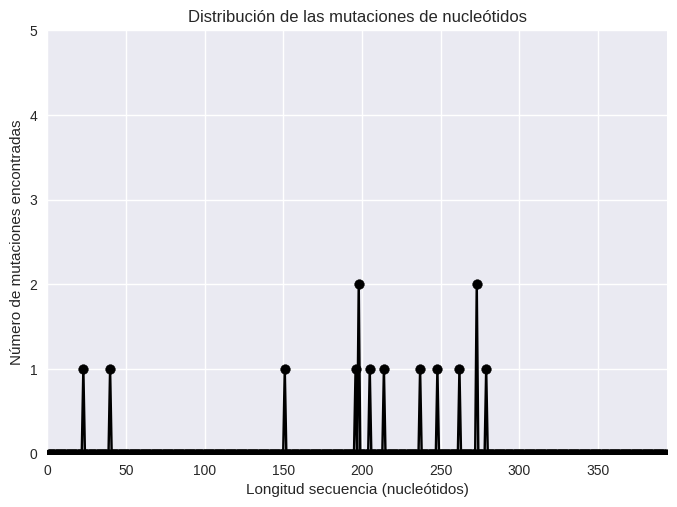

In [ ]:
## Plot
plt.style.use('seaborn-v0_8')
plt.scatter(counts_table['position'],counts_table['count'],color='black')
plt.plot(counts_table['position'],counts_table['count'],color='black')
# Límites ejes
plt.xlim(0,longitud_referencia_aa)
plt.ylim(0,5)
# Añadir título y leyenda de los ejes
plt.title("Distribución de las mutaciones de nucleótidos")
plt.xlabel("Longitud secuencia (nucleótidos)")
plt.ylabel("Número de mutaciones encontradas")

plt.show()

¿Cómo interpretas este gráfico?

# 5. Análisis mutacional final

Completa con la respuestas de las preguntas anteriores.

In [ ]:
# Deleción
num_del = 

# Mutación nonsense (codón STOP)
num_nonsense = 

# Mutación missense (cambio de AA)
num_missense = 

# Mutación silenciosa (no hay cambio de AA)
num_silent = 

total_alteracion = num_del + num_nonsense + num_missense + num_silent
num_normales = 25 - total_alteracion



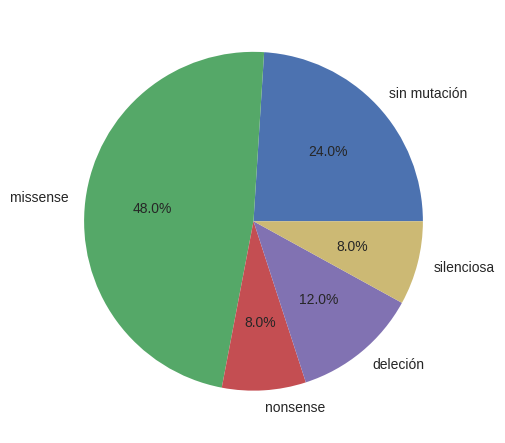

In [43]:
# Plot
data = [num_normales, num_missense, num_nonsense, num_del, num_silent ]
labels = ["sin mutación", "missense", "nonsense", "deleción", "silenciosa" ]
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

*Aquí tienes la solución por si la necesitas:*

In [42]:
# Deleción
num_del = 3

# Mutación nonsense (codón STOP)
num_nonsense = 2

# Mutación missense (cambio de AA)
num_missense = 12

# Mutación silenciosa (no hay cambio de AA)
num_silent = 2

total_alteracion = num_del + num_nonsense + num_missense + num_silent
num_normales = 25 - total_alteracion

